## import libraries

In [2]:
import numpy as np
import pandas as pd

## load dataset

In [35]:
import seaborn as sns
df = sns.load_dataset('iris')

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### discard setosa species from dataset

In [6]:
df=df[df['species']!='setosa']

In [7]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

### generate labels for species

In [9]:
df['species']=df['species'].map({"versicolor":0,"virginica":1})

### divide dataset into dependent and independent features

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [12]:
y.head()

50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int64

### Split the dataset into train and test data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
138,6.0,3.0,4.8,1.8
76,6.8,2.8,4.8,1.4
92,5.8,2.6,4.0,1.2
119,6.0,2.2,5.0,1.5


In [16]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [19]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
55 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [20]:
print(log_regressor.best_params_)

{'C': 10, 'penalty': 'l2'}


## find best score

In [21]:
print(log_regressor.best_score_)

0.97


Inference:

 **regressor giving 97% accuracy**

## Predict the test data

In [24]:
prediction_log = log_regressor.predict(X_test)

In [25]:
prediction_log

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [27]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


## plot the data

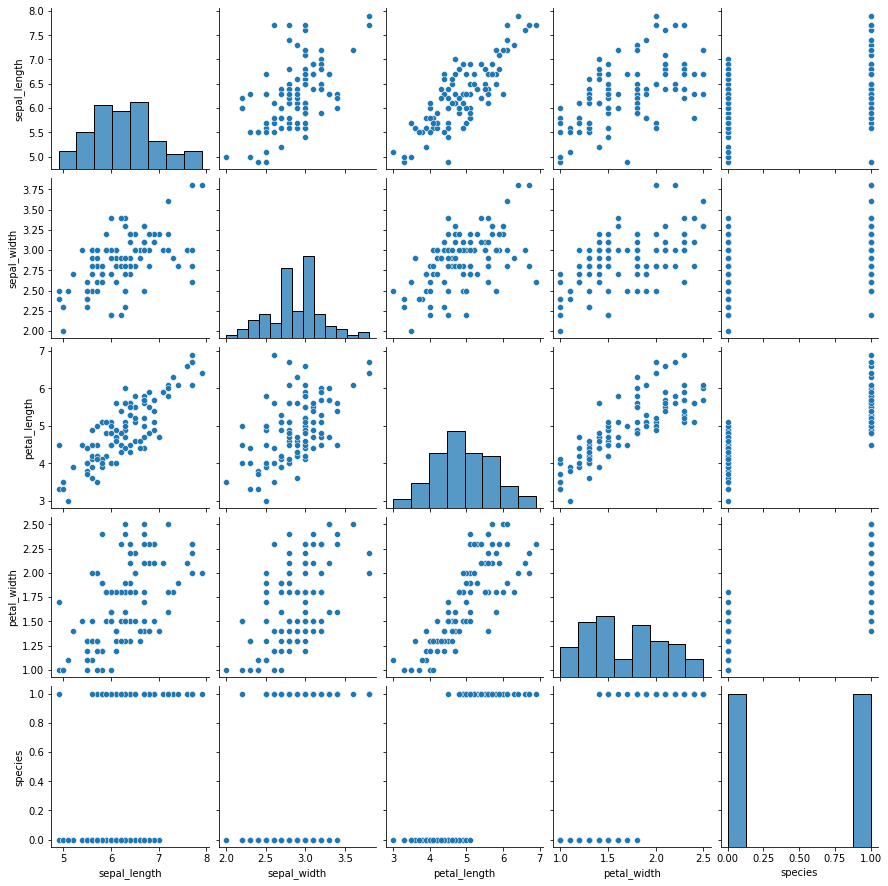

In [28]:
sns.pairplot(df, hue='species')

## find the f1 and accuracy score of *model*

In [33]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [30]:
# pass y_test and predicited data
confusion_matrix(y_test, prediction_log)

array([[11,  1],
       [ 0,  8]])

In [31]:
f1_score(y_test, prediction_log)

0.9411764705882353

In [34]:
accuracy_score(y_test, prediction_log)

0.95